In [2]:
#importing prophet
from fbprophet import Prophet
import os
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [5]:
df = pd.read_csv('chris-ice_atw1.csv')
df.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,2021-01-08,67.75,68.50,67.35,68.50,1.90,67.72,131.0,4190.0,NaN,NaN,242.0
1,2021-01-07,66.50,66.60,65.75,66.60,2.35,66.35,94.0,4171.0,NaN,NaN,79.0
2,2021-01-06,65.75,65.75,64.20,64.25,-0.65,64.48,63.0,4203.0,NaN,NaN,89.0
3,2021-01-05,68.50,68.75,65.90,64.90,-4.40,66.96,157.0,4180.0,NaN,NaN,75.0
4,2021-01-04,69.75,70.25,69.75,69.30,NaN,69.97,120.0,4183.0,NaN,NaN,9.0


In [6]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

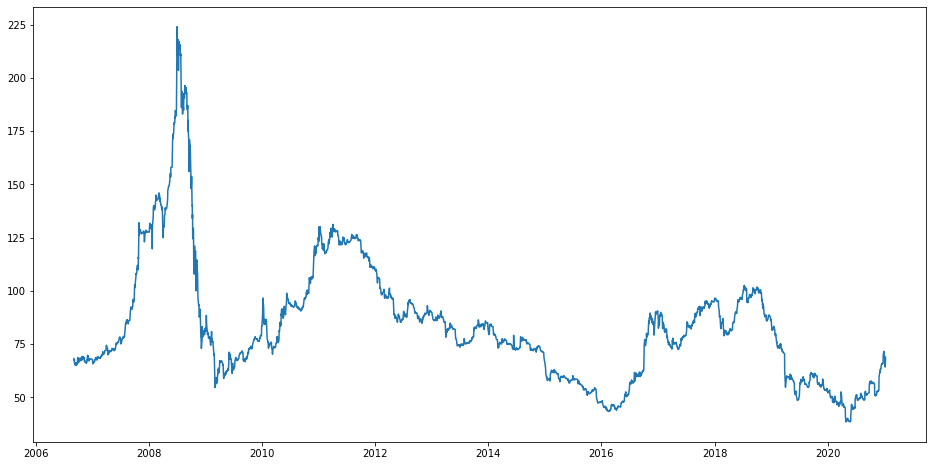

In [7]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Settle'], label='Close Price history')

In [12]:
data = df.sort_index(ascending=True, axis=0)


In [13]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Settle'])


In [16]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Settle'][i] = data['Settle'][i]

In [17]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [18]:
new_data.rename(columns={'Settle': 'y', 'Date': 'ds'}, inplace=True)


In [51]:
#train and validation
train = new_data[:3100]
valid = new_data[3100:]

In [52]:
#fit the model
model = Prophet(daily_seasonality=True)
model.fit(train)


In [53]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-09-04,65.139988,53.819455,70.012907,65.139988,65.139988,-3.126141,-3.126141,-3.126141,-2.895543,...,-0.227640,-0.227640,-0.227640,-0.002958,-0.002958,-0.002958,0.0,0.0,0.0,62.013847
1,2006-09-05,65.187191,53.987537,70.174451,65.187191,65.187191,-3.313703,-3.313703,-3.313703,-2.895543,...,-0.331938,-0.331938,-0.331938,-0.086221,-0.086221,-0.086221,0.0,0.0,0.0,61.873488
2,2006-09-06,65.234395,52.585651,70.326672,65.234395,65.234395,-3.445001,-3.445001,-3.445001,-2.895543,...,-0.386479,-0.386479,-0.386479,-0.162979,-0.162979,-0.162979,0.0,0.0,0.0,61.789394
3,2006-09-07,65.281598,53.511504,70.186740,65.281598,65.281598,-3.456444,-3.456444,-3.456444,-2.895543,...,-0.329838,-0.329838,-0.329838,-0.231063,-0.231063,-0.231063,0.0,0.0,0.0,61.825155
4,2006-09-08,65.328801,53.362123,69.461566,65.328801,65.328801,-3.510887,-3.510887,-3.510887,-2.895543,...,-0.326745,-0.326745,-0.326745,-0.288599,-0.288599,-0.288599,0.0,0.0,0.0,61.817914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,2020-05-13,133.487277,20.180738,215.651421,26.526229,224.368085,-7.771234,-7.771234,-7.771234,-2.895543,...,-0.386479,-0.386479,-0.386479,-4.489212,-4.489212,-4.489212,0.0,0.0,0.0,125.716043
3658,2020-05-14,133.534895,16.975809,217.078805,26.700214,224.840355,-7.721672,-7.721672,-7.721672,-2.895543,...,-0.329838,-0.329838,-0.329838,-4.496292,-4.496292,-4.496292,0.0,0.0,0.0,125.813222
3659,2020-05-15,133.582512,15.714985,217.465713,26.477922,225.312624,-7.712897,-7.712897,-7.712897,-2.895543,...,-0.326745,-0.326745,-0.326745,-4.490609,-4.490609,-4.490609,0.0,0.0,0.0,125.869615
3660,2020-05-16,133.630130,19.118440,219.023283,26.255630,225.784894,-6.125897,-6.125897,-6.125897,-2.895543,...,1.240697,1.240697,1.240697,-4.471051,-4.471051,-4.471051,0.0,0.0,0.0,127.504232


In [54]:
#rmse
forecast_valid = forecast['yhat'][3100:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

61.83713100789449

<ipython-input-55-0102cca35a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-55-0102cca35a87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = forecast_valid.values


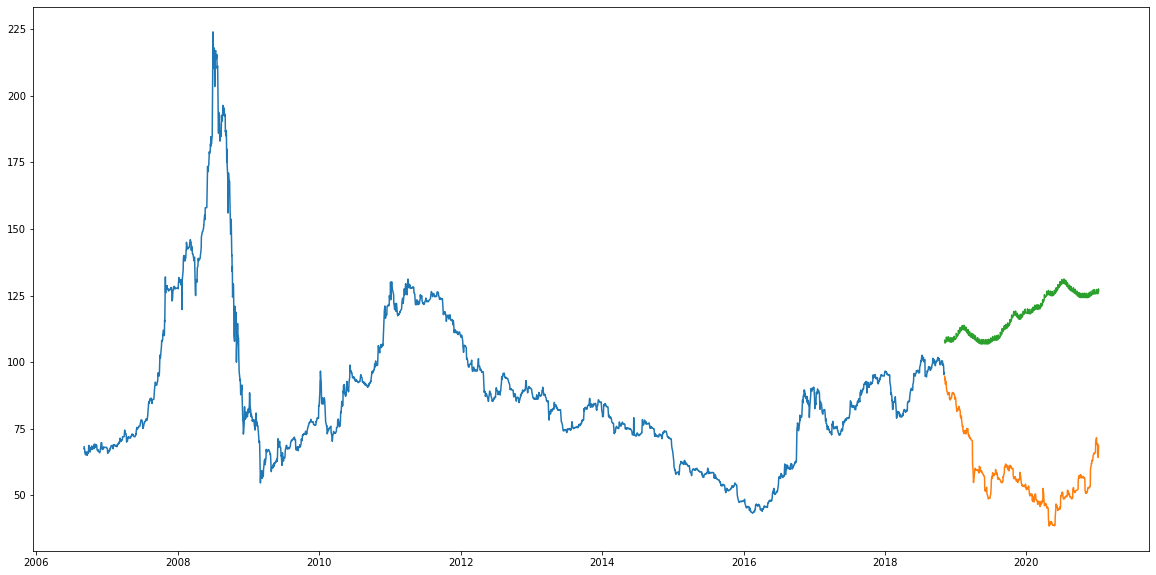

In [55]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])